# 머신러닝 End-To-End

## 1. 문제 정의
- T : 캘리포니아 집값 예측
- P : 집값의 오차
- E : 1990년 캘리포니아 인구 조사


## 2. 데이터 수집

In [1]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [10]:
print(housing.data.shape, housing.target.shape)
print(housing.feature_names) # 사이킷런 feature 명
print(housing.DESCR) # 사이킷런 데이터 소개

(20640, 8) (20640,)
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. cens

## 3. 데이터 탐색 및 시각화

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
data = pd.DataFrame(data = housing.data, columns = housing.feature_names)
data['target'] = housing.target

In [19]:
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [20]:
data.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [21]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb942784f98>,
      dtype=object)

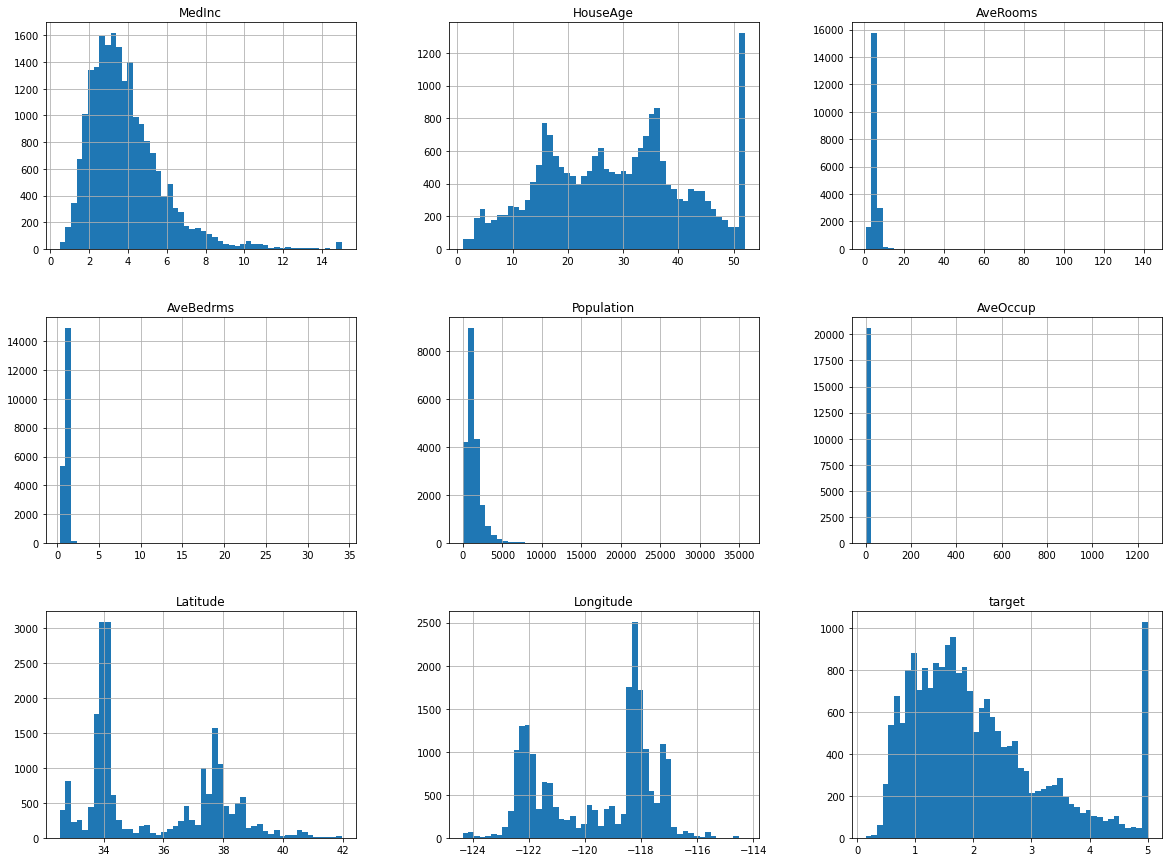

In [25]:
data.hist(bins = 50, figsize = (20, 15))

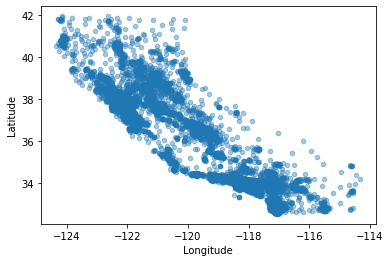

In [26]:
data.plot(kind = 'scatter', x = 'Longitude', y = 'Latitude', alpha = 0.4)

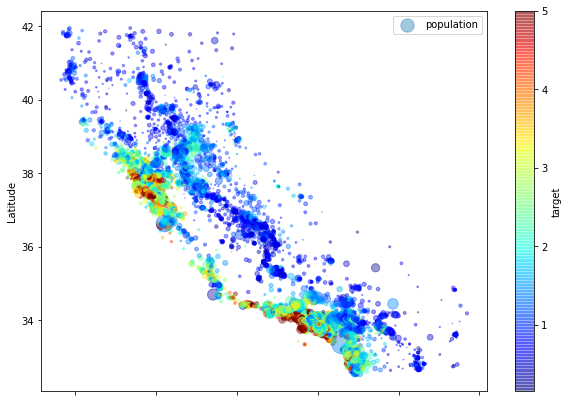

In [27]:
data.plot(kind = 'scatter', x = 'Longitude', y = 'Latitude', alpha = 0.4,
          s = data["Population"]/100, label = 'population', figsize = (10, 7),
          c = 'target', cmap = plt.get_cmap('jet'), colorbar = True)

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   target      20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


## 4. 머신러닝 데이터 준비

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(housing.data, housing.target)

In [30]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15480, 8) (5160, 8) (15480,) (5160,)


## 5. 모델 선택과 훈련, 검증

In [31]:
# 선형 회귀
from sklearn.linear_model import LinearRegression
lin = LinearRegression()
lin.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [33]:
housing_predictions = lin.predict(X_test)
print(f"예측 결과 : {housing_predictions}")

예측 결과 : [1.3843198  1.19507185 1.19703935 ... 3.54661975 3.62160461 1.22151745]


In [34]:
from sklearn.metrics import mean_squared_error

lin_mse = mean_squared_error(housing_predictions, y_test)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

0.7242033646804719


In [35]:
from sklearn.metrics import mean_absolute_error
lin_mae = mean_absolute_error(housing_predictions, y_test)
print(lin_mae)

0.5255151977924967


## 6. 모델 세부 튜닝

In [37]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(lin, X_train, y_train, scoring = "neg_mean_squared_error", cv = 10)
lin_rmse_scores = np.sqrt(-scores)
print(lin_rmse_scores)

[0.71732206 0.73209962 0.75596835 0.74131123 0.73853493 0.73743376
 0.72886634 0.70519973 0.7075039  0.71228362]
